# Activity: Build an XGBoost model

## Introduction

In this activity, you’ll build on the skills and techniques you learned in the decision tree and random forest lessons to construct your own XGBoost classification model. The XGBoost model is a very powerful extension of decision trees, so having a strong working familiarity with this process will strengthen your skills and resume as a data professional.

This activity is a continuation of the airlines project in which you built decision tree and random forest models. You will use the same data, but this time you will train, tune, and evaluate an XGBoost model. You’ll then compare the performance of all three models and decide which model is best. Finally, you’ll explore the feature importances of your model and identify the features that most contribute to customer satisfaction.


## Step 1: Imports

### Import packages

Begin with your import statements. First, import `pandas`, `numpy`, and `matplotlib` for data preparation. Next, import scikit-learn (`sklearn`) for model preparation and evaluation. Then, import `xgboost`, which provides the classification algorithm you'll implement to formulate your predictive model.

In [27]:
# Import relevant libraries and modules.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

from xgboost import XGBClassifier
from xgboost import plot_importance


import pickle
import dataframe_image as dfi
import shap
shap.initjs()


### Load the dataset

To formulate your model, `pandas` is used to import a csv of airline passenger satisfaction data called `Invistico_Airline.csv`. This DataFrame is called `airline_data`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

### YOUR CODE HERE ###

airline_data = pd.read_csv('Customer_Survey.csv', error_bad_lines=False)

C:\Users\nitin\AppData\Local\Temp\ipykernel_14280\2071960001.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  airline_data = pd.read_csv('Customer_Survey.csv', error_bad_lines=False)


### Display the data

Examine the first 10 rows of data to familiarize yourself with the dataset.

In [3]:
# Display the first ten rows of data.

airline_data.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


### Display the data type for each column

Next, observe the types of data present within this dataset.

In [4]:
# Display the data type for each column in your DataFrame.

airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall the methods for exploring DataFrames.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Recall a property of a `pandas` DataFrame that allows you to view the data type for each column.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `.dtypes` on your DataFrame `airline_data` to view the data type of each column.</details>

**Question:** Identify the target (or predicted) variable for passenger satisfaction. What is your initial hypothesis about which variables will be valuable in predicting satisfaction?

* Satisfaction is the target variable.
* Features like arrival and departure delays could negatively affect satisfaction.

## Step 2: Model preparation

Before you proceed with modeling, consider which metrics you will ultimately want to leverage to evaluate your model.

**Question:** Which metrics are most suited to evaluating this type of model?

Airlines might want to know if a customer is satisfied what are the key reasons for it, so that they can keep on those services and remove other services that are not as much important, to save operations costs.

- As this is a binary classfication problem, it will be important to evaluate not just accuracy, but the balance of false positives and false negatives that the model's predictions provide. Therefore, precision, recall, and ultimately the F1 score will be excellent metrics to use.
- The ROC AUC (Area Under the Receiver Operating Characteristic) score is also suited to this type of modeling.F1 score is a better choics as it captures both false positive and false negative into  its evaluation and penalizes if one is higher than the other.

Also when a data is imbalanced or skewed F1 score is preferred.

### Prepare your data for predictions

You may have noticed when previewing your data that there are several non-numerical variables (`object` data types) within the dataset.

To prepare this DataFrame for modeling, first convert these variables into a numerical format.

In [6]:
# Convert the object predictor variables to numerical dummies.

df_dummies = pd.get_dummies(airline_data, drop_first=True)
df_dummies

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction_satisfied,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,5,3,2,0,0.0,1,0,1,1,0
1,47,2464,0,0,0,3,0,2,2,3,...,2,3,2,310,305.0,1,0,1,0,0
2,15,2138,0,0,0,3,2,0,2,2,...,4,4,2,0,0.0,1,0,1,1,0
3,60,623,0,0,0,3,3,4,3,1,...,4,1,3,0,0.0,1,0,1,1,0
4,70,354,0,0,0,3,4,3,4,2,...,4,2,5,0,0.0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,29,1731,5,5,5,3,2,5,2,2,...,4,4,2,0,0.0,1,1,1,1,0
129876,63,2087,2,3,2,4,2,1,1,3,...,1,2,1,174,172.0,0,1,1,0,0
129877,69,2320,3,0,3,3,3,2,2,4,...,2,3,2,155,163.0,0,1,1,1,0
129878,66,2450,3,2,3,2,3,2,2,3,...,2,1,2,193,205.0,0,1,1,1,0


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about feature engineering](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/5mEqu/introduction-to-feature-engineering).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `pandas` function for transforming categorical data into "dummy" variables.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `get_dummies()` function on your DataFrame `airline_data` to create dummies for the categorical variables in your dataset. Note that your target variable will also need this treatment.</details>

### Isolate your target and predictor variables
Separately define the target variable (`satisfaction`) and the features.

In [7]:
# Define the y (target) variable.

y = df_dummies.satisfaction_satisfied
# Define the X (predictor) variables.

X = df_dummies.drop(['satisfaction_satisfied'], axis=1)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about splitting your data into x and y](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/ozK9K/build-a-decision-tree-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

In `pandas`, use square brackets `[]` to subset your DataFrame by specifying which column(s) to select. Also, quickly subset a DataFrame to exclude a particular column by using the `drop()` function and specifying the column to drop.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

In this case, your target variable was split into two columns from the dummy split. Be sure to include only the column which assigns a positive (i.e., "satisfied") outcome as 1.
</details>

### Divide your data 

Divide your data into a training set (75% of the data) and test set (25% of the data). This is an important step in the process, as it allows you to reserve a part of the data that the model has not used to test how well the model generalizes (or performs) on new data.

In [8]:
# Perform the split operation on your data.
# Assign the outputs as follows: X_train, X_test, y_train, y_test.

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 0)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about splitting your data between a training and test set](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/ozK9K/build-a-decision-tree-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

To perform the splitting, call the function in the `model_selection` module of `sklearn` on the features and target variable.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `train_test_split()` function, passing in both `features` and `target`, while configuring the appropriate `test_size`. Assign the output of this split as `X_train`, `X_test`, `y_train`, `y_test`.
</details>

## Step 3: Model building

### "Instantiate" your XGBClassifer

Before you fit your model to your airline dataset, first create the XGB Classifier model and define its objective. You'll use this model to fit and score different hyperparameters during the GridSearch cross-validation process.

In [9]:
# Define xgb to be your XGBClassifier.

xgb = XGBClassifier(objective = 'binary:logistic',random_state=0)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about constructing a classifier model from `xgboost`](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/njRAP/build-an-xgboost-model-with-python).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Note that the target variable in this case is a binary variable. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `XGBClassifier()` from `xgboost`. Set the objective as `binary:logistic`.
</details>

### Define the parameters for hyperparameter tuning

To identify suitable parameters for your `xgboost` model, first define the parameters for hyperparameter tuning. Specifically, consider tuning `max_depth`, `min_child_weight`, `learning_rate`, `n_estimators`, `subsample`, and/or `colsample_bytree`.

Consider a more limited range for each hyperparameter to allow for timely iteration and model training. For example, using a single possible value for each of the six hyperparameters listed above will take approximately one minute to run on this platform.

```
{
    'max_depth': [4],
    'min_child_weight': [3],
    'learning_rate': [0.1],
    'n_estimators': [5],
    'subsample': [0.7],
    'colsample_bytree': [0.7]
}
```

If you add just one new option, for example by changing `max_depth: [4]` to `max_depth: [3, 6]`, and keep everything else the same, you can expect the run time to approximately double. If you use two possibilities for each hyperparameter, the run time would extend to ~1 hour. 
         

In [10]:
# Define parameters for tuning as `cv_params`.

# NOTE! This cell will take a long time to run. Only uncomment and run it if you have the processing
#       power or patience to wait. Otherwise, scroll to see results.

# cv_params = {'max_depth': [4, 6],
#               'min_child_weight': [3, 5],
#               'learning_rate': [0.1, 0.2, 0.3],
#               'n_estimators': [5,10,15],
#               'subsample': [0.7],
#               'colsample_bytree': [0.7]
#               }
cv_params = {'colsample_bytree': [0.75],
 'learning_rate': [0.05, 0.1, 0.2],
 'max_depth': [6,8,10],
 'min_child_weight': [2],
 'n_estimators': [30,50,100],
 'subsample': [0.75]}

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about hyperparameter tuning using GridSearch cross-validation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/afopk/tune-a-decision-tree).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Consider a range of values for each parameter, similar to what you observed in the lesson. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Define these parameters using a Python dictionary in the following format: `{'parameter1': [range,of,values]}`</details>

**Question:** What is the likely effect of adding more estimators to your GridSearch?

- More estimators will initially improve the model's performance. However, increasing the number of estimators will also considerably increase the time spent during the GridSearch process, and there will be diminishing returns as the number of estimators continues to increase.

### Define how the models will be evaluated

Define how the models will be evaluated for hyperparameter tuning. To yield the best understanding of model performance, utilize a suite of metrics.

In [11]:
# Define your criteria as `scoring`.

scores = ['accuracy', 'precision', 'recall', 'f1']

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about [using metric evaluation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/afopk/tune-a-decision-tree) to determine the metrics you include.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Consider what you've learned about the limitations of only including a single metric, such as `accuracy`. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Define metrics which balance the false positives and false negatives in binary classification problems.

### Construct the GridSearch cross-validation 

Construct the GridSearch cross-validation using the model, parameters, and scoring metrics you defined. Additionally, define the number of folds and specify *which metric* from above will guide the refit strategy.

In [12]:
# Construct your GridSearch.
xgb_GSCV = GridSearchCV(xgb, cv_params, cv=5, scoring = scores, refit='f1')

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about constructing a GridSearch for [cross-validation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/W4vAW/verify-performance-using-validation).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Balance the time spent on validation with the number of folds you choose. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Choose the refit method which simultaneously balances false positives and false negatives.

### Fit the GridSearch model to your training data

If your GridSearch takes too long, revisit the parameter ranges above and consider narrowing the range and reducing the number of estimators.

**Note:** The following cell might take several minutes to run.

In [15]:
%%time
# fit the GridSearch model to training data

# xgb_GSCV.fit(X_train,y_train)

CPU times: total: 0 ns
Wall time: 0 ns


**Question:** Which optimal set of parameters did the GridSearch yield?

Best Parameters 
* colsample_bytree: 0.7
* learning_rate: 0.3
* max_depth: 6
* min_child_weight: 5
* n_estimators: 15
* subsample: 0.7

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about the result of the GridSearch.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Once you've fitted the GridSearch model to your training data, there will be an attribute to access which yields to the optimal parameter set.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Access the `best_params_` attribute from your fitted model. </details>

### Save your model for reference using `pickle`

Use the `pickle` library you've already imported to save the output of this model.

In [19]:
# Use `pickle` to save the trained model.
# pickle.dump(xgb_GSCV, open('Pickle/xgb_GSCV.pickle', 'wb'))
xgb_GSCV = pickle.load(open('Pickle/xgb_GSCV.pickle', 'rb'))
xgb_opt = xgb_GSCV.best_estimator_
xgb_GSCV.best_params_

{'colsample_bytree': 0.75,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 2,
 'n_estimators': 100,
 'subsample': 0.75}

In [20]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''
    
    table = pd.DataFrame(columns = ['Model', 'Precision', 'Recall', 'F1', 'Accuracy'])
    
    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                     'recall': 'mean_test_recall',
                     'f1': 'mean_test_f1',
                     'accuracy': 'mean_test_accuracy',
                     }
    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    for i in range(len(model_name)):
        # Isolate the row of the df with the max(metric) score
        best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric[i]]].idxmax(), :]

        # Extract Accuracy, precision, recall, and f1 score from that row
        f1 = best_estimator_results.mean_test_f1
        recall = best_estimator_results.mean_test_recall
        precision = best_estimator_results.mean_test_precision
        accuracy = best_estimator_results.mean_test_accuracy

        # Create table of results
        table.loc[len(table)]={'Model': model_name[i],
                            'Precision': precision,
                            'Recall': recall,
                            'F1': f1,
                            'Accuracy': accuracy,
                            }

    return table

out_xgb = make_results(['RF_F1','RF_AC','RF_RC','RF_PC'],xgb_GSCV,['f1','accuracy','recall','precision'])
out_xgb

,Model,Precision,Recall,F1,Accuracy
0,RF_F1,0.968559,0.950166,0.959273,0.955908
1,RF_AC,0.968559,0.950166,0.959273,0.955908
2,RF_RC,0.966162,0.950730,0.958377,0.954871
3,RF_PC,0.968559,0.950166,0.959273,0.955908


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about "pickling" prior models](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/FSnam/build-and-validate-a-random-forest-model-using-a-validation-data-set).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The model to be pickled is the fitted GridSearch model from above. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `pickle.dump()`, reference the fitted GridSearch model, and provide a name for the pickle file.

## Step 4: Results and evaluation

### Formulate predictions on your test set

To evaluate the predictions yielded from your model, leverage a series of metrics and evaluation techniques from scikit-learn by examining the actual observed values in the test set relative to your model's prediction.

First, use your trained model to formulate predictions on your test set.

In [25]:
# Apply your model to predict on your test data. Call this output "y_pred".

y_preds_xgb = xgb_opt.predict(X_test)

In [32]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'Model': [model_name],
                        'Precision': [precision],
                        'Recall': [recall],
                        'F1': [f1],
                        'Accuracy': [accuracy]
                        })

    return table

results_xgb = get_test_scores('GB Test', y_preds_xgb,y_test)
results_xgb = pd.concat([out_xgb.iloc[0:1,:],results_xgb],axis=0)
results_xgb['Model'].iloc[0]='GB CV'

results_xgb.dfi.export('Figures/GB Evaluation Metrics.png',dpi=300)

results_xgb

C:\Users\nitin\AppData\Local\Temp\ipykernel_14280\3274095878.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_xgb['Model'].iloc[0]='GB CV'


,Model,Precision,Recall,F1,Accuracy
0,GB CV,0.968559,0.950166,0.959273,0.955908
0,GB Test,0.971031,0.950196,0.960501,0.957037


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about creating predictions from trained models.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the fitted GridSearch model from your training set and predict the predictor variables you reserved in the train-test split.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `predict()` on your fitted model and reference `X_test` to create these predictions.
</details>

### Leverage metrics to evaluate your model's performance

Apply a series of metrics from scikit-learn to assess your model. Specifically, print the accuracy score, precision score, recall score, and f1 score associated with your test data and predicted values.

In [33]:
# 1. Print your accuracy score.
AC = accuracy_score(y_test,y_pred)
print(f'Accuracy Score: {AC:.3f}')

# 2. Print your precision score.
PS = precision_score(y_test,y_pred)
print(f'Prediction Score: {PS:.3f}')

# 3. Print your recall score.
RS = recall_score(y_test,y_pred)
print(f'Recall Score: {RS:.3f}')

# 4. Print your f1 score.
F1 = f1_score(y_test,y_pred)
print(f'F1 Score: {F1:.3f}')

Accuracy Score: 0.957
Prediction Score: 0.971
Recall Score: 0.950
F1 Score: 0.961


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about model evaluation for detail on these metrics](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/njRAP/build-an-xgboost-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in the `metrics` module in `sklearn` to compute each of these metrics.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `accuracy_score()`, `precision_score()`, `recall_score()`, and `f1_score()`, passing `y_test` and `y_pred` into each.
</details>

**Question:** How should you interpret your accuracy score?

The accuracy score for this model is 0.934, or 93.4% accurate.

**Question:** Is your accuracy score alone sufficient to evaluate your model?

No accuracy score is not enough for this as false negatives and false positives also need to be accounted for.

* If airlines wants to cater for unsatisfied customers, then precision should be good as unnecessary budget should not be wasted for satisfied customer and recall should also be good as not a lot of unstaisfied customers should go unnoticed.

* Also if airlines wants to see which services to continue and which services to stop f1 score helps that the model predicts and recalls well so the important features might have been correctly identified.

* Recall is good when a brand wants to promote brand loyalty and identification of all satisfied customers is necessary.

**Question:** When observing the precision and recall scores of your model, how do you interpret these values, and is one more accurate than the other?

* Precision and recall scores are both useful to evaluate the correct predictive capability of the model because they balance the false positives and false negatives inherent in prediction. 
* The model shows a precision score of 0.947, suggesting the model is very good at predicting true positives. This means the model correctly predicts whether the airline passenger will be satisfied. 
* The recall score of 0.933 is also very good. This means that the model does a good job of correctly identifying satisfied passengers within the dataset. 
* These two metrics combined give a better assessment of model performance than the accuracy metric does alone.

**Question:** What does your model's F1 score tell you, beyond what the other metrics provide?*

The F1 score balances the precision and recall performance to give a combined assessment of how well this model delivers predictions. 
* In this case, the F1 score is 0.940, which suggests very strong predictive power in this model.

### Gain clarity with the confusion matrix

Recall that a **confusion matrix** is a graphic that shows a model's true and false positives and true and false negatives. It helps to create a visual representation of the components feeding into the metrics above.

Create a confusion matrix based on your predicted values for the test set.

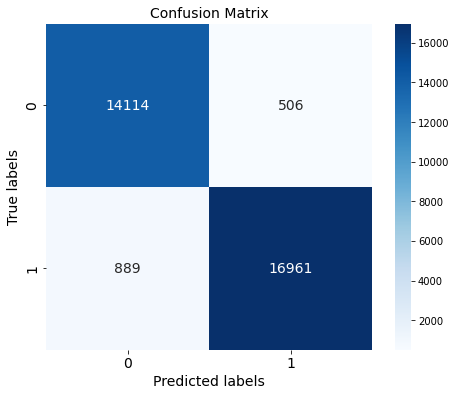

In [34]:
# Construct and display your confusion matrix.

cm = confusion_matrix(y_test,y_pred)

# Create the display for your confusion matrix.
fontsize=14
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',annot_kws={"size": fontsize}, cbar=True, square=True)
plt.xlabel('Predicted labels', fontsize=fontsize)
plt.ylabel('True labels', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.title('Confusion Matrix', fontsize=fontsize)
plt.savefig('Figures/Confusion Matrix.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about model evaluation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/njRAP/build-an-xgboost-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the functions in the `metrics` module to create a confusion matrix.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `confusion_matrix`, passing in `y_test` and `y_pred`. Next, utilize `ConfusionMatrixDisplay()` to display your confusion matrix.
</details>

**Question:** When observing your confusion matrix, what do you notice? Does this correlate to any of your other calculations?

The top left to bottom right diagonal in the confusion matrix represents the correct predictions, and the ratio of these squares showcases the accuracy.

Additionally, the concentration of true positives and true negatives stands out relative to false positives and false negatives, respectively. This ratio is why the precision score is so high (0.944).

### Visualize most important features

`xgboost` has a built-in function to visualize the relative importance of the features in the model using `matplotlib`. Output and examine the feature importance of your model.

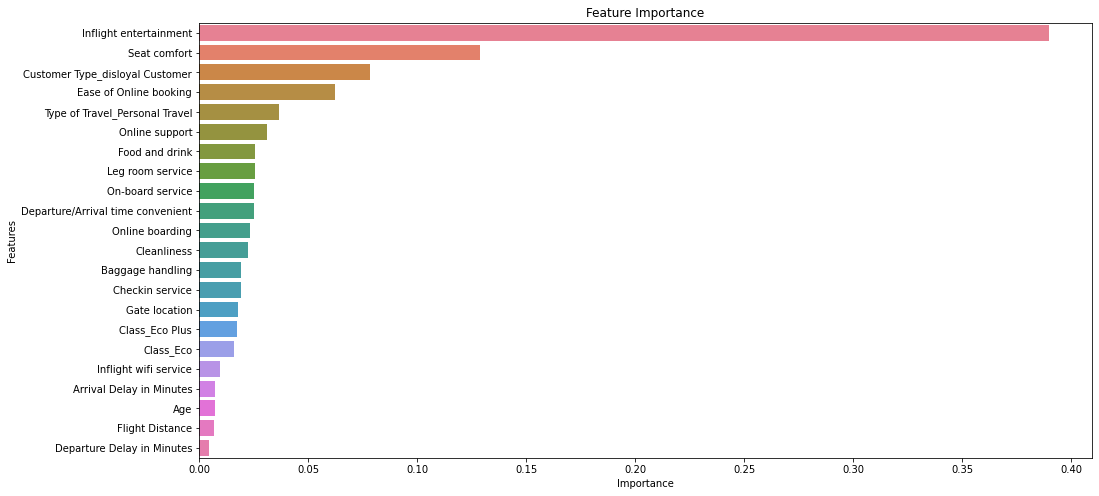

In [48]:
# Plot the relative feature importance of the predictor variables in your model.
importances = xgb_opt.feature_importances_
feature_names = xgb_opt.feature_names_in_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
# Sort the DataFrame by importance values
importance_df = importance_df.sort_values('Importance', ascending=False)
# palette = ["#fee090", "#fdae61", "#4575b4", "#313695", "#e0f3f8", "#abd9e9", "#d73027", "#a50026"]
# Plotting using seaborn
plt.figure(figsize=(16, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', palette='husl', legend=False)
# Add labels and title
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.savefig('Figures/Feature Importance Plots.png', format='png', dpi=300, bbox_inches='tight')
# Show plot
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall the attributes that are provided once the model is fitted to training data.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Examine the `best_estimator_` attribute of your fitted model.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

To easily visualize feature importance, call the built-in `plot_importance` function `xgboost` offers on the `best_estimator_`.</details>

**Question:** Examine the feature importances outputted above. What is your assessment of the result? Did anything surprise you?

- By a wide margin, "seat comfort" rated as most important in the model.The type of seating is very different between first class and coach seating. However, the perks of being in first class also go beyond the seating type, so perhaps that is an underlying explanation of this feature's importance.
- Surprisingly, delays (both arrival and departure) did not score as highly important.

### Compare models

Create a table of results to compare model performance.

In [50]:
# Create a table of results to compare model performance.

table = pd.DataFrame({'Model': ["Decision Tree", "Random Forest", "Gradient Boosting"],
                      'Precision': [0.95432, 0.969121, 0.971031],
                      'Recall': [0.931980, 0.949269, 0.950196],
                      'F1': [0.943043, 0.959092, 0.960501],
                      'Accuracy': [0.938342, 0.955672, 0.957037]
                     }
                    )
table

import dataframe_image as dfi
table.dfi.export('Figures/Evaluation Metrics.png',dpi=300)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Create a DataFrame and using the `pd.DataFrame()` function. 

</details>

**Question:** How does this model compare to the decision tree and random forest models you built in previous labs? 

Based on the results shown in the table above, the F1, precision, recall, and accuracy scores of the XGBoost model are similar to the corresponding scores of the decision tree and random forest models. The random forest model seemed to outperform the decision tree model as well as the XGBoost model. 

### SHAP Analysis

In [37]:
explainer = shap.Explainer(xgb_opt,X_train)
shap_values = explainer(X_test)
# you can save time by passing only subset of observations few rows
# shap_values = explainer(X[:100])

100%|===================| 32461/32470 [08:59<00:00]        

In [38]:
np.shape(shap_values.values)
# Same size as features X

(32470, 22)

### Waterfall Plot

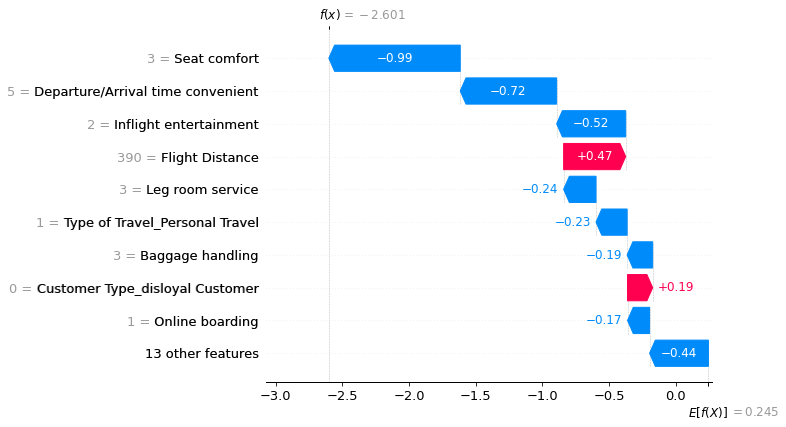

In [28]:
shap.plots.waterfall(shap_values[25])

In this plot
* E[f(X)] is average prediction for all observations
* f(x) is prediction for this observation
* SHAP values are values in between the plot
    > They tell us how each model feature has contributed to the difference between the prediction and average prediction.

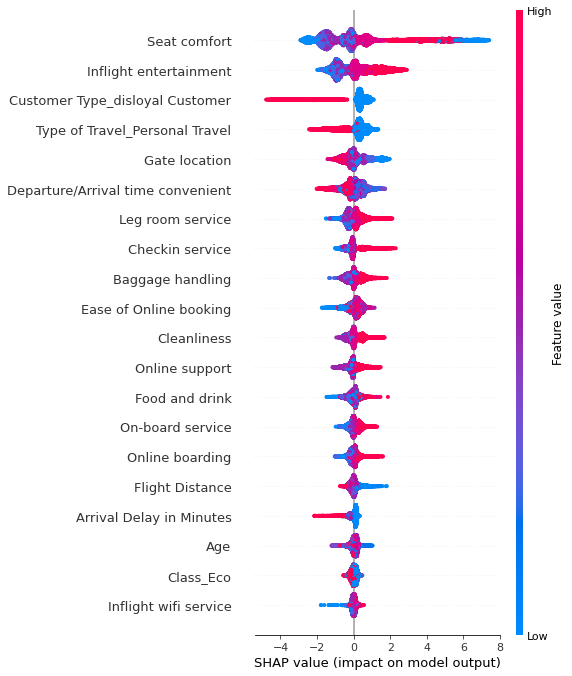

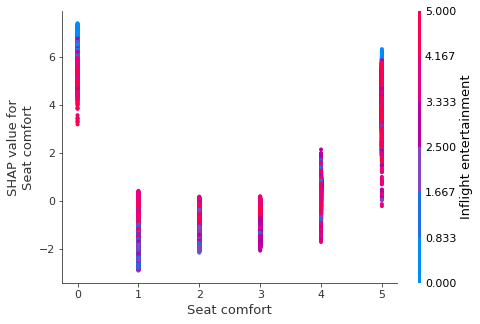

In [39]:
show=True
shap.summary_plot(shap_values, X_test, show=show)
if show == False:
    plt.savefig('Figures/Feature summary.png', format='png', dpi=300, bbox_inches='tight')
    plt.close()
shap.dependence_plot("Seat comfort", shap_values.values, X_test, show=show)
if show == False:
    plt.savefig('Figures/Feature Dependence.png', format='png', dpi=300, bbox_inches='tight')
    plt.close()

## Considerations

**What are some key takeaways you learned from this lab?**
- The evaluation of the model is important to inform if the model has delivered accurate predictions.
- Splitting the data is important for ensuring that there is new data for the model to test its predictive performance.
- Each metric provides an evaluation from a different standpoint, and accuracy alone is not a strong way to evaluate a model.
- Effective assessments balance the true/false positives versus true/false negatives through the confusion matrix and F1 score.

**How would you share your findings with your team?**
- Showcase the data used to create the prediction and the performance of the model overall.
- Review the sample output of the features and the confusion matrix to reference the model's performance.
- Highlight the metric values, emphasizing the F1 score.
- Visualize the feature importance to showcase what drove the model's predictions.

**What would you share with and recommend to stakeholders?**
- The model created is highly effective at predicting passenger satisfaction.
- The feature importance of seat comfort warrants additional investigation. It will be important to ask domain experts why they believe this feature scores so highly in this model.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged